In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<b>9.1</b> A coin is thrown independently 10 times to test the hypothesis that the probability
of heads is 1/2 versus the alternative that the probability is not 1/2 . The test rejects
if either 0 or 10 heads are observed.

<b>a.</b> What is the significance level of the test?

significance level $= \mathbb{P}(\text{type I error}) = \mathbb{P}(\text{0 heads}) + \mathbb{P}(\text{10 heads})$

In [4]:
from scipy.stats import binom
binom.pmf(0,10,0.5) + binom.pmf(10,10,0.5)

0.001953125

<b>b.</b> If in fact the probability of heads is .1, what is the power of the test?

power $= \mathbb{P}(\text{reject } H_0 \text{when it is false})$ 

In [5]:
binom.pmf(0,10,0.1) + binom.pmf(10,10,0.1)

0.34867844019999994

<b>9.3</b> Suppose that X ∼ bin(100, p). Consider the test that rejects $H_0$ : p = .5 in favor
of $H_A$ : p $\neq$ .5 for |X − 50| > 10. Use the normal approximation to the binomial
distribution to answer the following:

<b>a.</b> What is α?

In [13]:
from scipy.stats import norm
2*norm.cdf(40,50,5)

0.045500263896358389

<b>b.</b> Graph the power as a function of p.

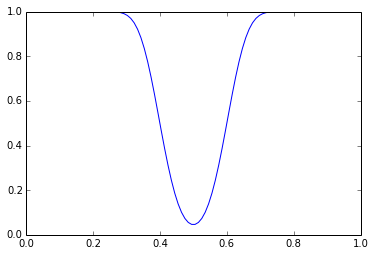

In [20]:
p = linspace(0,1,100)
def reject(p):
    return norm.cdf(40,100*p,sqrt(100*p*(1-p))) + 1 - norm.cdf(60,100*p,sqrt(100*p*(1-p)))
plot(p,reject(p));

<b>9.4</b> Let X have one of the following distributions:
<table>
  <tr>
    <td>$X$</td>
    <td>$H_0$</td> 
    <td>$H_A$</td>
  </tr>
  <tr>
    <td>$x_1$</td>
    <td>.2</td> 
    <td>.1</td>
  </tr>
    <tr>
    <td>$x_2$</td>
    <td>.3</td> 
    <td>.4</td>
  </tr>
    <tr>
    <td>$x_3$</td>
    <td>.3</td> 
    <td>.1</td>
  </tr>
    <tr>
    <td>$x_4$</td>
    <td>.2</td> 
    <td>.4</td>
  </tr>
</table>

<b>a.</b> Compare the likelihood ratio, $\Lambda$, for each possible value X and order the $x_i$
according to $\Lambda$.

In [22]:
h_0 = array([0.2,0.3,0.3,0.2])
h_a = array([0.1,0.4,0.1,0.4])
h_0/h_a

array([ 2.  ,  0.75,  3.  ,  0.5 ])

So the order is $x_3,x_1,x_2,x_4$

<b>b.</b> What is the likelihood ratio test of $H_0$ versus $H_A$ at level α = .2? What is the
test at level α = .5?

When $\Lambda$ is small, we reject $H_0$ Given that $H_0$ is true, what value of $\lambda$ gives 

$$\mathbb{P}(\text{reject } H_0|H_0) = 0.2$$ 

For $\alpha = 0.2$ clearly if $\lambda$ is less than 0.5, we accept the null hypothesis always. Therefore we must look for a $\lambda$ bigger than 0.5. If $\lambda$ equals 0.75, then we reject $H_0$ in two cases, which means that $\alpha$ is 0.5, which is too big. Therefore, $0.5 \leq \lambda < 0.75$ 

For $\alpha =0.5$, we can use similar logic and say $0.75 \leq \lambda < 2$ 

<b>c.</b> If the prior probabilities are $P(H_0 ) = P(H_A )$, which outcomes favor $H_0$ ?

Clearly, when $\lambda >1$ we choose $H_0$, therefore, $x_3$ and $x_1$.

<b>d.</b> What prior probabilities correspond to the decision rules with α = .2 and
α = .5?

For $\alpha = 0.2$, we can have priors anywhere between $P(H_0 ) = 1/3 , P(H_A )  = 2/3$ and $P(H_0 ) = 3/7 , P(H_A )  = 4/7$

For $\alpha = 0.5$, we can have priors anywhere between $P(H_0 ) = 3/7 , P(H_A )  = 4/7$ and $P(H_0 ) = 2/3 , P(H_A )  = 1/3$

<b>9.6</b> Consider the coin tossing example of Section 9.1. Suppose that instead of tossing
the coin 10 times, the coin was tossed until a head came up and the total number
of tosses, X , was recorded.

<b>a.</b> If the prior probabilities are equal, which outcomes favor $H_0$ and which favor
$H_1$ ?

<b>b.</b> Suppose $P(H_0 )/P(H_1 ) = 10$. What outcomes favor $H_0$ ?

<b>c.</b> What is the significance level of a test that rejects $H_0$ if X ≥ 8?

<b>d.</b> What is the power of this test?

<b>9.7</b> Let $X_1 , . . . , X_n$ be a sample from a Poisson distribution. Find the likelihood ratio
for testing $H_0 : λ = λ_0$ versus $H_A : λ = λ_1$ , where $λ_1 > λ_0$ . Use the fact that the
sum of independent Poisson random variables follows a Poisson distribution to
explain how to determine a rejection region for a test at level α.

<b>9.8</b> Show that the test of Problem 7 is uniformly most powerful for testing $H_0 : λ = λ_0$
versus $H_A : λ > λ_0$ . 

<b>9.11</b> Suppose that $X_1 , . . . , X_25$ form a random sample from a normal distribution hav-
ing a variance of 100. Graph the power of the likelihood ratio test of $H_0 : μ = 0$
versus $H_A : μ = 0$ as a function of μ, at significance levels .10 and .05. Do the
same for a sample size of 100. Compare the graphs and explain what
you see.